## County Choropleth Maps

Filling county data for county level choropleth map is a bit tricky. 

`geom_map()` **always** expects the **same** column names in a map data frame as we have seen (either (long,lat,region) or (x,y,id)), and **always** links the data column specified by the `map_id` aes to the `region` or `id` column in the map data frame.

So, you can draw and fill states just fine as you have seen in the practice; but for counties, you have to make a change in the map data frame.

**See the example below:** 


In [1]:
library(ggplot2)

sc <- map_data('county', 'south carolina')
head(sc)

long,lat,group,order,region,subregion
<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
-82.24809,34.41758,1,1,south carolina,abbeville
-82.31685,34.35455,1,2,south carolina,abbeville
-82.31111,34.33163,1,3,south carolina,abbeville
-82.31111,34.29152,1,4,south carolina,abbeville
-82.28247,34.26860,1,5,south carolina,abbeville
-82.25955,34.25142,1,6,south carolina,abbeville


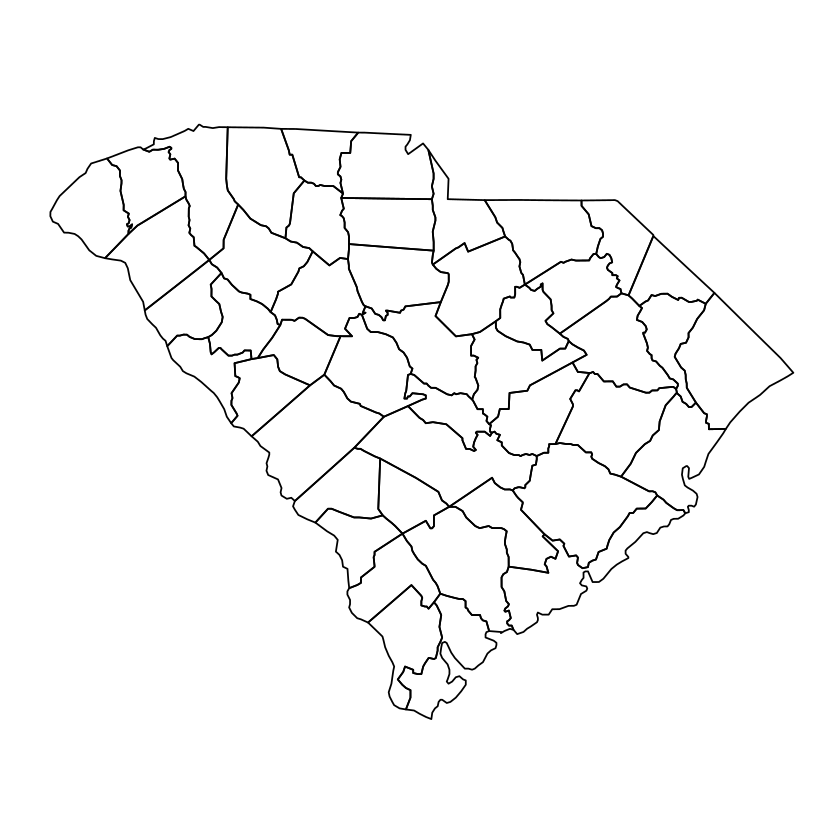

In [2]:
ggplot() + 
geom_map(data=sc, map=sc, aes(map_id=region), fill=NA, color="black") + 
expand_limits(x=sc$long, y=sc$lat) +
coord_map("polyconic") + 
theme_void()



Let's create some made-up data frame to have some values linked to the county data.

**We need to make sure that the county names are NOT categories but strings so that they can verbatimly match the county names in the map data frame.** 


In [3]:
dsf <- data.frame(county=as.character(unique(sc$subregion)), pop = seq(1,46),  stringsAsFactors = FALSE)
head(dsf)
str(dsf)

county,pop
<chr>,<int>
abbeville,1
aiken,2
allendale,3
anderson,4
bamberg,5
barnwell,6


'data.frame':	46 obs. of  2 variables:
 $ county: chr  "abbeville" "aiken" "allendale" "anderson" ...
 $ pop   : int  1 2 3 4 5 6 7 8 9 10 ...


**Here is the trick:** geom_map ALWAYS links to the `region` column; so we can do the following to create a region column with county names:

In [4]:
sc$region = sc$subregion
head(sc)

long,lat,group,order,region,subregion
<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
-82.24809,34.41758,1,1,abbeville,abbeville
-82.31685,34.35455,1,2,abbeville,abbeville
-82.31111,34.33163,1,3,abbeville,abbeville
-82.31111,34.29152,1,4,abbeville,abbeville
-82.28247,34.26860,1,5,abbeville,abbeville
-82.25955,34.25142,1,6,abbeville,abbeville


Now, the `region` column contains counties; we can link our data to counties.

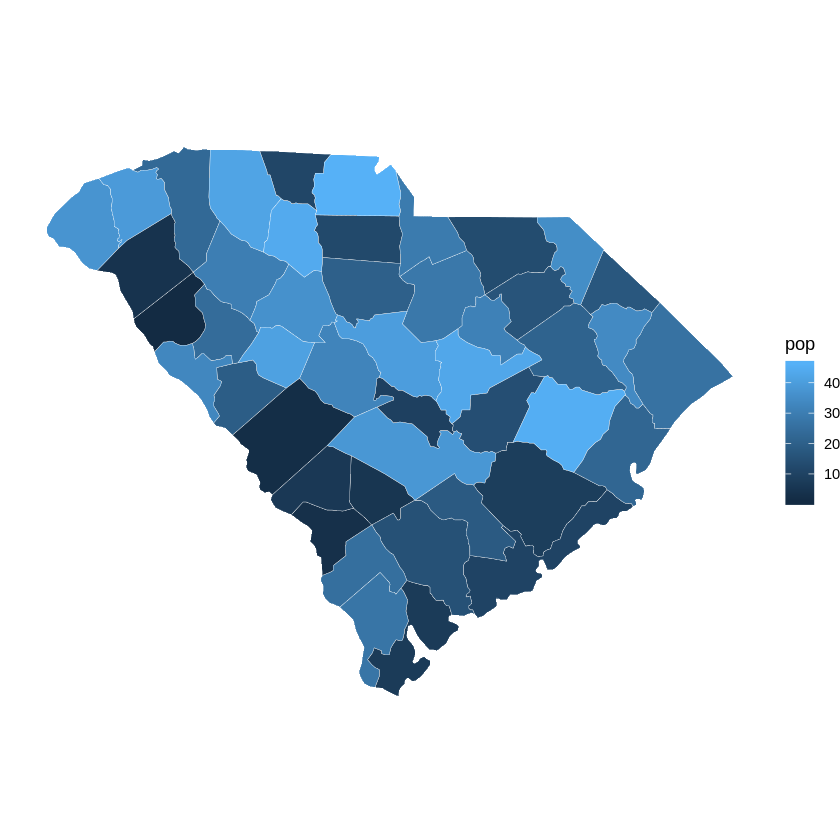

In [5]:
# use dsf as the data frame and fill the regions with pop
ggplot(data=dsf, aes(fill=pop)) + 

# link "county" column in dsf to "region" column in sc 
geom_map(map=sc, aes(map_id=county), color="white", size=0.1) +  

expand_limits(x = sc$long, y = sc$lat) + 
coord_map("polyconic") +
theme_void()

---

We can also add text labels on the map; below, we compute the mean coordinates for each county to create a data frame that contains county names and (long,lat) pairs that approximately represent the centers of counties. Then we can use `geom_text` or `geom_text_repel` to add names on the map.  

In [6]:
library(dplyr)
name_data <- sc %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat))

head(name_data)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



region,long,lat
<chr>,<dbl>,<dbl>
abbeville,-82.42925,34.18418
aiken,-81.67263,33.53039
allendale,-81.36359,32.95725
anderson,-82.61956,34.57094
bamberg,-80.99482,33.14832
barnwell,-81.47433,33.23674


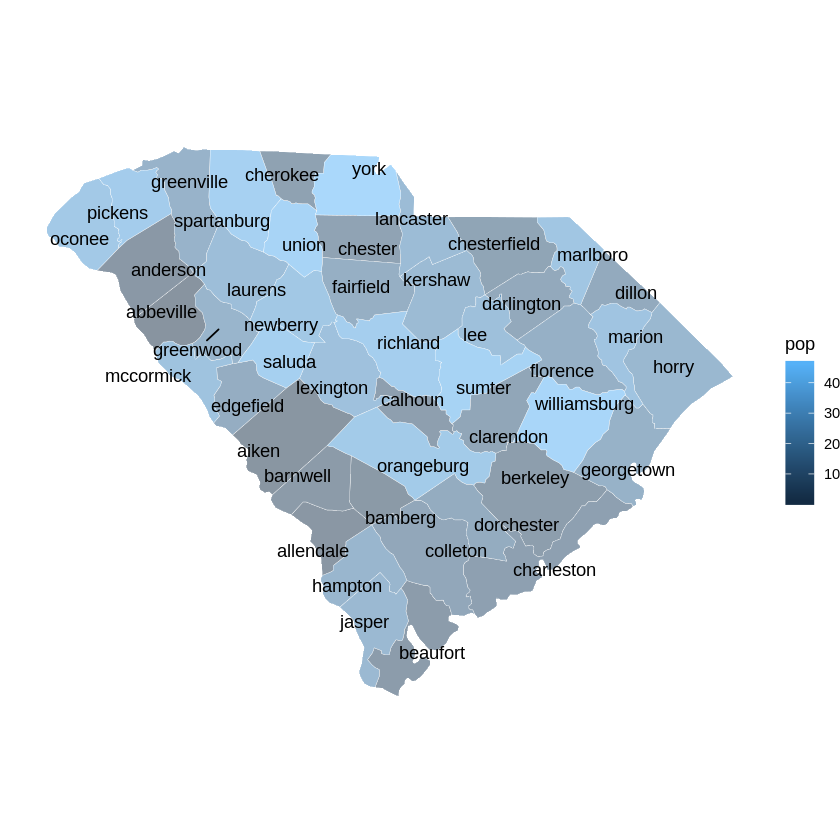

In [7]:
library(ggrepel)

ggplot() + 


geom_map(data=dsf, map=sc, aes(map_id=county, fill=pop), color="white", size=0.1, alpha=0.5) +  

geom_text_repel(data=name_data, aes(x=long, y=lat, label=region)) + 

expand_limits(x = sc$long, y = sc$lat) + 
coord_map("polyconic") +
theme_void()



We can overlay this map on top of other layers like in the following example. 


You'll remember part of this code from practices:

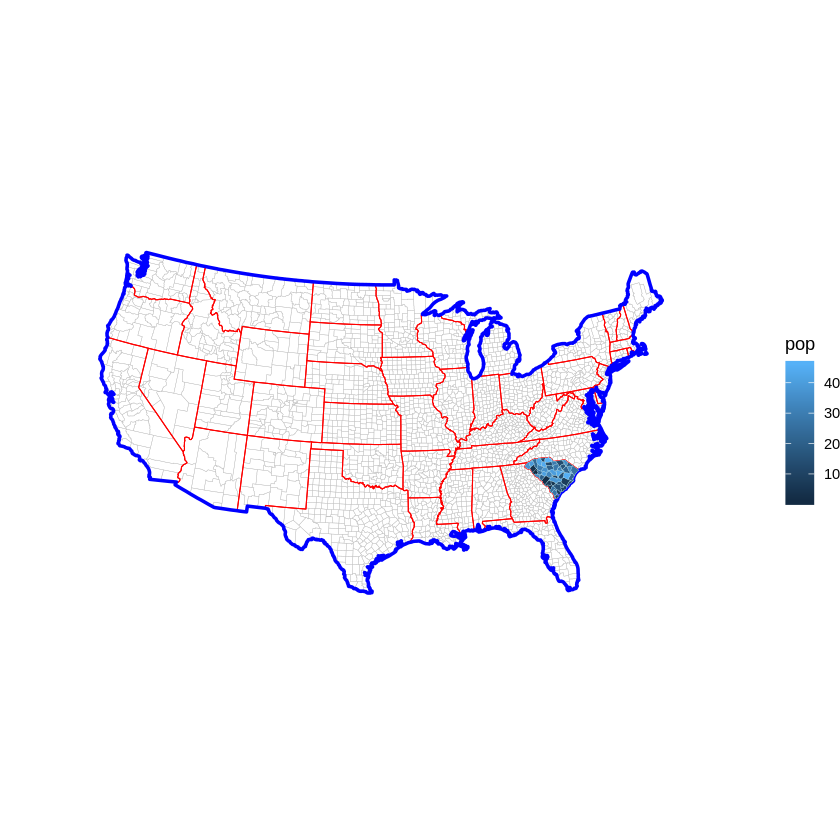

In [8]:
state <- map_data("state")
county <- map_data("county")
usa <- map_data("usa")

gg <- ggplot() + 
 geom_map(data=county, map=county, aes(map_id=region), color="grey", fill=NA, size=0.1) +
 geom_map(data=state, map=state, aes(map_id=region), color="red", fill=NA, size=0.3) +
 geom_map(data=usa, map=usa, aes(map_id=region), color="blue", fill=NA, size=1) +

 geom_map(data=dsf, map=sc, aes(map_id=county, fill=pop), color="lightblue", size=0.1) + 
 
 coord_map("albers", lat0=30, lat1=40) + 
 expand_limits(x = usa$long, y = usa$lat) +
 theme_void()
gg

We can change the limits to focus on the South Carolina. 

Also, look how the **order** of geom_maps dictate the drawing order of layers. 

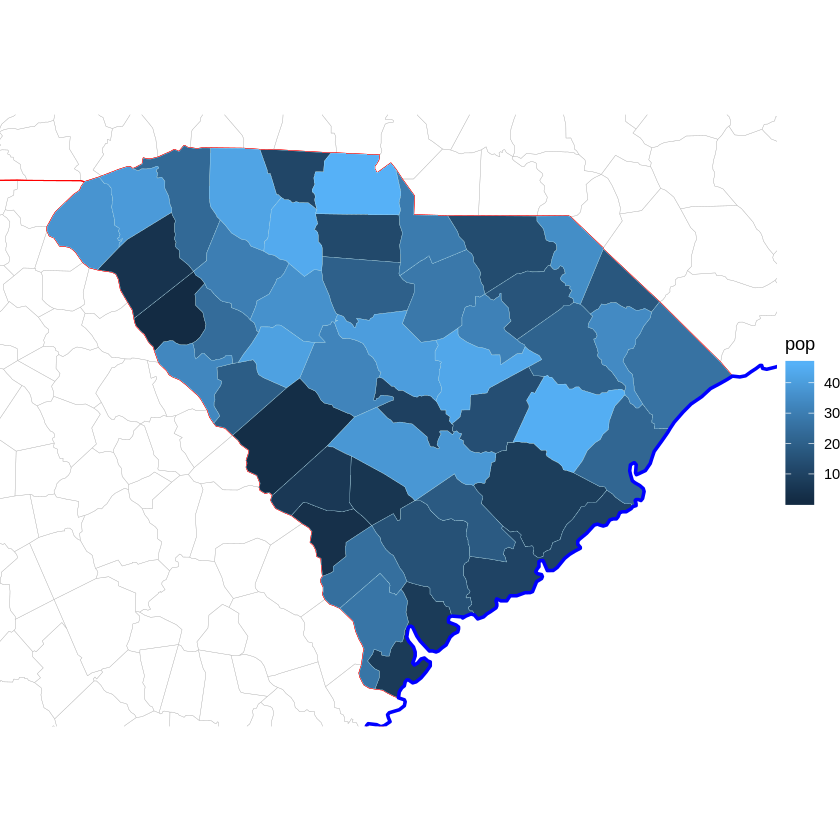

In [9]:
state <- map_data("state")
county <- map_data("county")
usa <- map_data("usa")

gg <- ggplot() + 
 geom_map(data=county, map=county, aes(map_id=region), color="grey", fill=NA, size=0.1) +
 geom_map(data=state, map=state, aes(map_id=region), color="red", fill=NA, size=0.3) +

 geom_map(data=dsf, map=sc, aes(map_id=county, fill=pop), color="lightblue", size=0.1) + 

 geom_map(data=usa, map=usa, aes(map_id=region), color="blue", fill=NA, size=1) +
 
 coord_map("albers", lat0=30, lat1=40) + 
 expand_limits(x = sc$long, y = sc$lat) + 
 theme_void()
gg

## YOUR TURN: 
**Repeat the same visualization from the cell above for Missouri. Make sure to expand the limits of the map to show entire neighbor states only.** You can make up the data frame for fill values. 

(Hint: use latlong.net to find coordinates for xlim() and ylim().) 

In [ ]:
mo <- map_data('county', 'missouri')

< YOUR CODE HERE >

In [ ]:
gg <- ggplot() + 
 
 < YOUR CODE HERE > 
 coord_map("albers", lat0=30, lat1=40) +
 #ylim(c(33, 44)) + xlim(c(-102, -82)) + 
 theme_void()
gg